# Advanced Business Analytics (CIS442D)

## Homework Assignment 6
### Due date: 2/27/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

In [153]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pydot_ng as pydot # visualization of trees (among many others)
from IPython.display import Image
from IPython.display import IFrame # displaying pdf file in jupyter
from scipy import misc
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import cluster
from sklearn import svm
from sklearn import datasets
from sklearn import mixture
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import interact
from matplotlib import cm
from matplotlib.colors import LogNorm
np.set_printoptions(precision=1)



%matplotlib inline

# Exercise 1: Image segmentation (clustering)

In this exercise, you will apply the K-Means and Hierarchichal clustering algorithm to an image of your choice. 
1. Load a color image to a numpy array using the function imread (see the lecture notebook for the exact syntax). 
2. Plot the image (represented as array) using the command imshow.
3. What are the dimensions of the array? what is the total number of pixels? what are the maximal and minimal values of the array?
4. Convert the previous array to a 2-dimensional array where each row corresponds to a pixel, and there are 3 columns corresponding to the intensities of the colors Red, Green, and Blue.
5. Apply the K-Mean algorithm with K=2 and answer the following questions:
  1. What are the colors of the first and second pixels?
  2. Which clusters are associated with the first and second pixels?
  3. Plot the colors of the centroids returned by the K-Mean algorithm
  4. Plot the segmented image (that is, the original image after the color of each pixel is transformed into the nearest centroid)
6. (optional) Repeat 5, this time applying the hierarchichal clustering algorithm:
  1. Randomly sample 1000 points from the image (you may use numpy.random.choice)
  2. Apply hierarchichal clustering
  3. Compute the centroids of each cluster
  4. Compute the distance between each data point (pixel) and the centroids (you may use the function scipy.spatial.distance.cdist)
  5. Transform each pixel to the nearest centroid
  6. Plot the segmented image
    

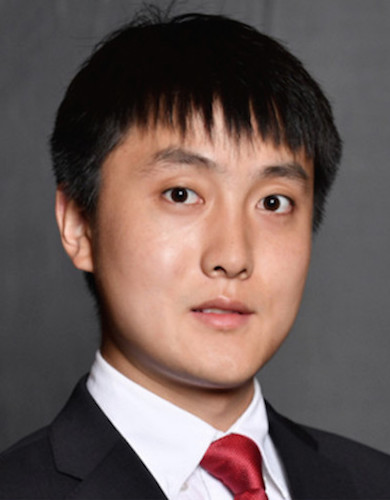

In [154]:
# show the image
Image("Profile Picture.jpg")

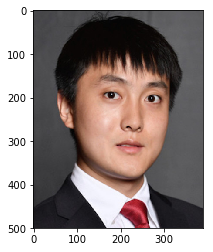

In [155]:
# Load a color image 
a0 = misc.imread("profile Picture.jpg",mode='RGB')
# Plot the image (represented as array) using the command imshow.
plt.imshow(a0)

In [156]:
# demension
a0.shape
# 500*390 pixels
print('max value: %d'%np.amax(a0))
print('min value: %d'%np.amin(a0))

max value: 255
min value: 0


In [157]:
rows,cols,depth=a0.shape
a1 = a0.reshape(rows*cols,depth)
a1.shape

(195000, 3)

In [158]:
# Apply the K-Mean algorithm with K=2 and answer the following questions:
kmeans = cluster.KMeans(n_clusters=2).fit(a1)

[77 77 79]
1
[77 77 79]
1


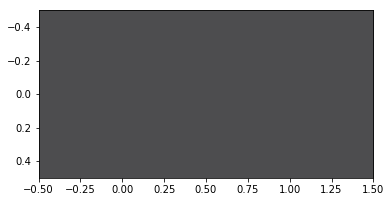

In [168]:
# What are the colors of the first pixels?
# Which clusters are associated with the first pixels?
print(a1[0,:])
print(kmeans.labels_[0])
# What are the colors of the second pixels?
# Which clusters are associated with the second pixels?

print(a1[1,:]) 
print(kmeans.labels_[1])
color = np.vstack((a1[0,:],a1[1,:]))

plt.imshow([color.astype(np.uint8)],interpolation = 'nearest')

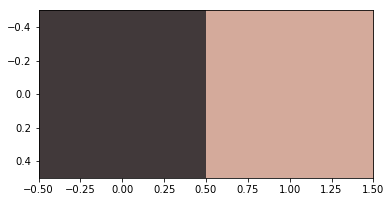

In [134]:
#Plot the colors of the centroids returned by the K-Mean algorithm
plt.imshow([kmeans.cluster_centers_.astype(np.uint8)], interpolation='nearest',)

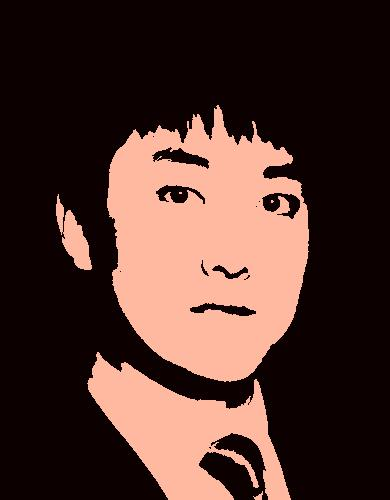

In [135]:
# Plot the segmented image
a2 = np.array([kmeans.cluster_centers_[c,:] for c in kmeans.predict(a1)]).reshape((rows,cols,depth))
misc.imsave('profile_quantized.jpg',a2)
Image('profile_quantized.jpg')

In [136]:
#Randomly sample 1000 points from the image
index = np.random.choice(len(a1),1000)
a3 = a1[index]
a3.shape

(1000, 3)

In [137]:
# Apply hierarchichal clustering
distance_matrix = scipy.spatial.distance.pdist(a3)
distance_matrix
Z = hierarchy.linkage(distance_matrix,method='ward',metric='euclidean')

In [138]:
T = hierarchy.cut_tree(Z, n_clusters=[2])

In [139]:
# Compute the centroids of each cluster
# pair label with 1000 points
df_point = pd.DataFrame(a3,index = index, columns = ['r','g','b'])
df_point
df_label = pd.DataFrame(T,index = index, columns = ['l'])
df_label
df = pd.merge(df_point,df_label, left_index = True, right_index = True)
df
# use mean as centroids
df_centroid = df.groupby('l').agg(np.mean)
centroid0 = [df_centroid.iloc[0,0],df_centroid.iloc[0,1],df_centroid.iloc[0,2]]
centroid1 = [df_centroid.iloc[1,0],df_centroid.iloc[1,1],df_centroid.iloc[1,2]]
centroid = [centroid0,centroid1]

In [180]:
# compute the distance
distance = scipy.spatial.distance.cdist(a1,centroid, 'euclidean')

In [141]:
# Transform each pixel to the nearest centroid
a4 = []
for a in distance:
    if a[0] < a[1]:
        a4.append(centroid0)
    else:
        a4.append(centroid1)

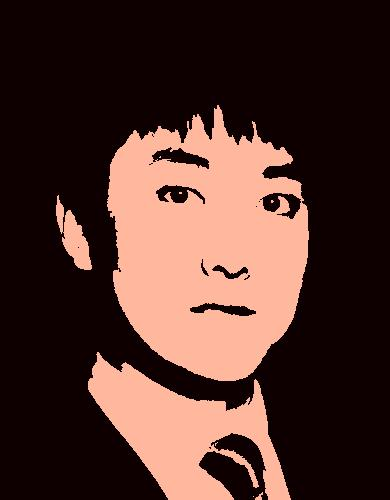

In [142]:
# reshape the data and print the photo
a5= np.array(a4).reshape((rows,cols,depth))
misc.imsave('profile_quantized1.jpg',a5)
Image('profile_quantized1.jpg')

# Exercise 2: digit recognition (classification)
The sklearn.datasets package embeds some small toy datasets (http://scikit-learn.org/stable/datasets/). The dataset digits contains 1797 images of digits, represented as arrays of pixels, and the actual label (that is, the digit depicted in the image) of each image.

1. Run the command: digits = datasets.load_digits() to load images of digits (make sure to import the proper package)
2. Describe the attribute digits.data
3. Describe the attribute digits.images
4. Choose a random number x between 0-1797 (that is, choose a random image). 
    1. Plot image x
    2. Print the corresponding label
5. Split the data to training and test sets. 
6. Use the training set to fit a classification tree of maximal depth 1.
7. Choose a data point (image) in the test set, and predict its value using the classifier:
    1. Plot the image
    2. Print the label
    3. Print the prediction for the image (that is, the prediction for the digit depicted in the image)
8. Use cross validation to evaluate the quality of the classifier
9. Plot the classification tree
10. Fit the training data using a support vector classifier
11. Use cross validation to evaluate the quality of the support vector classifier
12. Which classifier would you use to recognize digits? explain your findings

In [171]:
#1 load images of digits
digits = datasets.load_digits()

In [172]:
#2 present data in matrix form 
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [173]:
#3 the attribute 'image' holds each image as a matrix
digits.images

array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,   0., ...,  12.,   0.,   0.],
        [  0.,   0.,   3., ...,  14.,   0.,   0.],
        [  0.,   0.,   8., ...,  16.,   0.,   0.],
        ..., 
        [  0.,   9.,  16., ...,   0.,   0.,   0.],
        [  0.,   3.,  13., ...,  11.,   5.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.]],

       ..., 
       [[  0.,   0., 

3

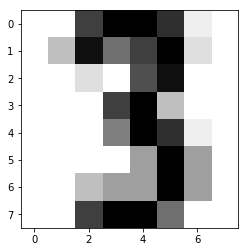

In [174]:
#4 Plot image x and print the corresponding label
plt.imshow(digits.images[345],cmap=plt.cm.gray_r, interpolation='nearest')
digits.target[345]

In [175]:
#5 Split the data to training and test sets
X = digits.data
Y = digits.target
I = digits.images

X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, Y, I, test_size=0.4, random_state=0)


5


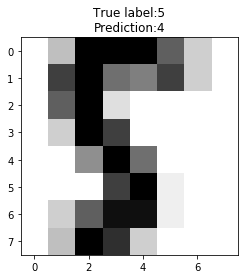

In [176]:
#6 and 7 Choose the 100th data point (image) in the test set, and predict its value using the classifier
# Plot the image
plt.imshow(i_test[100],cmap=plt.cm.gray_r, interpolation='nearest')
# True the label
print(y_test[100])

clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X_train,y_train)
# Prediction for the image (that is, the prediction for the digit depicted in the image)
clf.predict(X_test)[100]

# Print the true and prediction label
plt.gca().set_title('True label:' + str(y_test[100]) + '\nPrediction:' + str(clf.predict(X_test)[100]))


In [149]:
# 8 Use cross validation to evaluate the quality of the classifier
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 0.2  0.2  0.2  0.2  0.2]
Accuracy: 0.22 (+/- 0.01)


In [150]:
# 9
with open("tree.dot", 'w') as f:
    tree.export_graphviz(clf,out_file=f, filled=True, class_names=['0','1','2','3','4','5','6','7','8','9'] ) 
    #clf.classes_
    
pydot.graph_from_dot_file('tree.dot').write_pdf('tree.pdf')

# display pdf file
IFrame('tree.pdf', width=900, height=400)

In [151]:
# 10 Fit the training data using a support vector classifier
clf = svm.SVC(kernel='linear')#, gamma=0.001)
clf = clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[ 1.  1.  1.  1.  1.]
Accuracy: 0.97 (+/- 0.01)


In [152]:
# Which classifier would you use to recognize digits? explain your findings

# I will use support vector machine to classifiy the digits. Beacuse it has a much higher accuracy.

# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter4/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1
# A list is a value that contains multiple values in an ordered sequence.

In [36]:
# Solution to Q2
# insert()

In [35]:
# Solution to Q3
# d

In [34]:
# Solution to Q4
# d

In [33]:
# Solution to Q5
# ['a', 'b']

In [32]:
# Solution to Q6
# 1

In [31]:
# Solution to Q7
#[3.14, 'cat', 11, 'cat', True, 99]

In [39]:
# Solution to Q8
# [3.14, 11, 'cat', True, 99]

In [ ]:
# Solution to Q9
# + operator

In [ ]:
# Solution to Q10
# The previous append() method call adds the argument to the end of the list. 
# The insert() method can insert a value at any index in the list. 

In [ ]:
# Solution to Q11
# remove method

In [ ]:
# Solution to Q12
# ists aren’t the only data types that represent ordered sequences of values. 
# For example, strings and lists are actually similar, if you consider a string to be a “list” of single text characters.
# Many of the things you can do with lists can also be done with strings: indexing; 
# slicing; and using them with for loops, with len(), and with the in and not in operators.

In [ ]:
# Solution to Q13
# But the main way that tuples are different from lists is that tuples, like strings, are immutable. 
# Tuples cannot have their values modified, appended, or removed. 

In [ ]:
# Solution to Q14
# type(('a',))

In [ ]:
# Solution to Q15
# Just like how str(42) will return '42', the string representation of the integer 42, 
# the functions list() and tuple() will return list and tuple versions of the values passed to them.

In [ ]:
# Solution to Q16
# they contain references to lists

In [ ]:
# Solution to Q17
# if the list you need to copy contains lists, then use the copy.deepcopy() function instead of copy.copy(). 

In [45]:
# Solution to practice project 1

In [ ]:
# Solution to practice project 2
